
# Project: Investigate a Dataset -[Medical Appointment No Shows
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
 01 - PatientId
Identification of a patient
02 - AppointmentID
Identification of each appointment
 -03 Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.
05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.
06 - Age
How old is the patient.
07 - Neighbourhood
Where the appointment takes place.
08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
09 - Hipertension
True or False
10 - Diabetes
True or False
Alcoholism
True or False
Handcap
True or False
SMS_received
1 or more messages sent to the patient.
No-show
True or False.
KaggleV2-May-2016.csv

### Question(s) for Analysis
1-How does the presence of certain health conditions (Hipertension, Diabetes, Alcoholism, Handcap) affect the likelihood of missing an appointment? )
2-how does the number of SMS reminders received affect the likelihood of missing an appointment, considering different age groups and health conditions?")

<a id='wrangling'></a>
## Data Wrangling




### General Properties

General Properties
First let's import the necessary libraries and load the dataset to understand its structure and check for missing or errant data.

In [1]:

import pandas as pd
import numpy as np
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df.shape#to know the size of the the dataset
df.head()#print the few lines
df.dtypes# data types
df.info()#to know if there is missing values
df.describe()#to know if the is erant data
#fix the errant data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


observations
The dataset contains 110,527 entries and 14 columns.
No missing values were found.
Some columns have data types that need to be converted:
ScheduledDay and AppointmentDay should be datetime.
PatientId should be integer.
There is an errant data point in the Age column (negative value).

In [3]:
# first i made a serach to find is there are any missing values by comparing the total rows by df.shape method and everycolumn valuei  df.info so no missing values
#in df.dtypes i noticed that Scudeled day and appoitment day are object type so i will convert them to date 
# i noticed that the min age is negative value 
# i noticed that patient id float type which can be integer because integers accurately represent large whole numbers without the precision issues that can affect floating-point numbers.



### Data Cleaning

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])#convert to date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])#convertto date 
df['PatientId'] = df['PatientId'].astype('int64')#convert patient id to integer at patient id float type which can be integer because integers accurately represent large whole numbers without the precision issues that can affect floating-point numbers.
 
# Step 3: Handle Errant Data
# Remove rows with negative Age values
df = df[df['Age'] >= 0]
df.shape# the dataset size after removing negative ages
df.duplicated().sum()#noduplicates rows
df.isnull().sum()#no missing values
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Convert ScheduledDay and AppointmentDay to datetime.
Convert PatientId to integer.
Remove rows with negative Age values.
checkfor duplicate rows and none were found
check for missing value and none were found
After cleaning, we should confirm the dataset structure and descriptive statistics again. by df.dsecribe

# <a id='eda'></a>
## Exploratory Data Analysis


 ### Research Question Q1  (How does the presence of certain health conditions (Hipertension, Diabetes, Alcoholism, Handcap) affect the likelihood of missing an appointment? )

purpose of the Analysis
The objective of this analysis is to determine how the presence of certain medical conditions (Hypertension, Diabetes, Alcoholism, and Handicap) affects the likelihood of missing a medical appointment. By calculating and comparing the proportions of missed appointments among patients with and without these conditions, we can identify if these factors influence the tendency to miss appointments.

In [5]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Hypertension
#Objective: Determine how the presence of the (Hipertension, Diabetes, Alcoholism, Handcap)affects the likelihood of missing an appointment.
#Steps:
#1Filter the Data:
#2Separate the data into groups based on whether the patient has hypertension (Hipertension = 1) or not (Hipertension = 0).
#3Calculate the Counts:
#4Count the number of missed appointments (No-show = "Yes") for each group.
#5Calculate the Total Count
#6Count the total number of appointments for each group.
#7Calculate the Proportion:
#8Compute the proportion of missed appointments within each group.
counts_hypertension = df[df['Hipertension'] == 1]['No-show'].value_counts()
counts_no_hypertension = df[df['Hipertension'] == 0]['No-show'].value_counts()
proportion_hypertension = counts_hypertension.get('Yes', 0) / (counts_hypertension.get('Yes', 0) + counts_hypertension.get('No', 0))
proportion_no_hypertension = counts_no_hypertension.get('Yes', 0) / (counts_no_hypertension.get('Yes', 0) + counts_no_hypertension.get('No', 0))
print(f"Proportion of missed appointments with Hypertension: {proportion_hypertension:.2f}")
print(f"Proportion of missed appointments without Hypertension: {proportion_no_hypertension:.2f}")
# Count the number of missed appointments for each diabetes status
counts_diabetes = df[df['Diabetes'] == 1]['No-show'].value_counts()
print (counts_diabetes)
counts_no_diabetes = df[df['Diabetes'] == 0]['No-show'].value_counts()
# Calculate the proportions
proportion_diabetes = counts_diabetes.get('Yes', 0) / (counts_diabetes.get('Yes', 0) + counts_diabetes.get('No', 0))
proportion_no_diabetes = counts_no_diabetes.get('Yes', 0) / (counts_no_diabetes.get('Yes', 0) + counts_no_diabetes.get('No', 0))
print(f"Proportion of missed appointments with Diabetes: {proportion_diabetes:.2f}")
print(f"Proportion of missed appointments without Diabetes: {proportion_no_diabetes:.2f}")
# Count the number of missed appointments for each alcoholism status
counts_alcoholism = df[df['Alcoholism'] == 1]['No-show'].value_counts()
counts_no_alcoholism = df[df['Alcoholism'] == 0]['No-show'].value_counts()
# Calculate the proportions
proportion_alcoholism = counts_alcoholism.get('Yes', 0) / (counts_alcoholism.get('Yes', 0) + counts_alcoholism.get('No', 0))
proportion_no_alcoholism = counts_no_alcoholism.get('Yes', 0) / (counts_no_alcoholism.get('Yes', 0) + counts_no_alcoholism.get('No', 0))
print(f"Proportion of missed appointments with Alcoholism: {proportion_alcoholism:.2f}")
print(f"Proportion of missed appointments without Alcoholism: {proportion_no_alcoholism:.2f}")
# Count the number of missed appointments for each handicap status
counts_handcap = df[df['Handcap'] == 1]['No-show'].value_counts()
counts_no_handcap = df[df['Handcap'] == 0]['No-show'].value_counts()
# Calculate the proportions
proportion_handcap = counts_handcap.get('Yes', 0) / (counts_handcap.get('Yes', 0) + counts_handcap.get('No', 0))
proportion_no_handcap = counts_no_handcap.get('Yes', 0) / (counts_no_handcap.get('Yes', 0) + counts_no_handcap.get('No', 0))
print(f"Proportion of missed appointments with Handicap: {proportion_handcap:.2f}")
print(f"Proportion of missed appointments without Handicap: {proportion_no_handcap:.2f}")
# Note this all is single varible 1D

Proportion of missed appointments with Hypertension: 0.17
Proportion of missed appointments without Hypertension: 0.21
No     6513
Yes    1430
Name: No-show, dtype: int64
Proportion of missed appointments with Diabetes: 0.18
Proportion of missed appointments without Diabetes: 0.20
Proportion of missed appointments with Alcoholism: 0.20
Proportion of missed appointments without Alcoholism: 0.20
Proportion of missed appointments with Handicap: 0.18
Proportion of missed appointments without Handicap: 0.20


Steps in the Code
Filter the Data:

Separate the data into groups based on whether the patient has a specific condition or not.
Calculate the Counts:

Count the number of missed appointments (No-show = "Yes") for each group (those with the condition and those without).
Calculate the Total Count:

Count the total number of appointments for each group (both missed and attended appointments).
Calculate the Proportion:

Compute the proportion of missed appointments within each group by dividing the number of missed appointments by the total number of appointments.
Conclusions
Based on these proportions, we can make the following observations:

Hypertension:

Patients with hypertension (0.17) are less likely to miss their appointments compared to those without hypertension (0.21).
Diabetes:

Patients with diabetes (0.18) are slightly less likely to miss their appointments compared to those without diabetes (0.20).
Alcoholism:

The proportion of missed appointments is the same for patients with and without alcoholism (0.20). This indicates that alcoholism does not significantly affect the likelihood of missing an appointment in this dataset.
Handicap:

Patients with a handicap (0.18) are slightly less likely to miss their appointments compared to those without a handicap (0.20).

the code below do the follwing: Data Dictionary:

A dictionary named data is created with two keys: 'Condition' and 'Proportion'.
'Condition' contains labels describing the presence or absence of each health condition.
'Proportion' contains the calculated proportions of missed appointments for each corresponding condition.
DataFrame Creation:

A pandas DataFrame named df_proportions is created from the data dictionary. This DataFrame will have two columns: 'Condition' and 'Proportion'.
Plotting:

The plot method is called on the df_proportions DataFrame to create a bar chart.
kind='bar': Specifies that the plot should be a bar chart.
x='Condition': Specifies that the 'Condition' column should be used for the x-axis labels.
y='Proportion': Specifies that the 'Proportion' column should be used for the y-axis values.
legend=False: Hides the legend.
color='skyblue': Sets the color of the bars to sky blue.
edgecolor='yellow': Sets the edge color of the bars to yellow.
Customizing the Plot:

ax.set_ylabel('Proportion of Missed Appointments'): Sets the label for the y-axis to "Proportion of Missed Appointments".
ax.set_title('Proportion of Missed Appointments by Health Condition'): Sets the title of the plot to "Proportion of Missed Appointments by Health Condition".

Text(0.5, 1.0, 'Proportion of Missed Appointments by Health Condition')

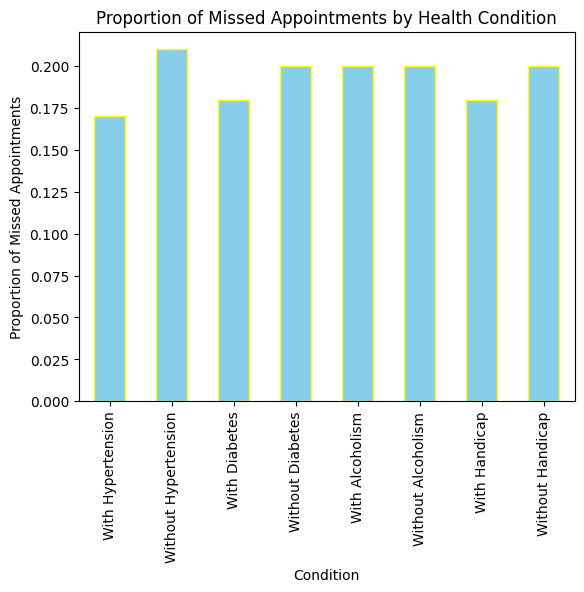

In [6]:
data = {
    'Condition': [
        'With Hypertension', 'Without Hypertension',
        'With Diabetes', 'Without Diabetes',
        'With Alcoholism', 'Without Alcoholism',
        'With Handicap', 'Without Handicap'
    ],
    'Proportion': [
        0.17, 0.21,
        0.18, 0.20,
        0.20, 0.20,
        0.18, 0.20
    ]
    
}
df_proportions = pd.DataFrame(data)
df_proportions
ax = df_proportions.plot(kind='bar', x='Condition', y='Proportion', legend=False,color='skyblue', edgecolor='yellow')
ax.set_ylabel('Proportion of Missed Appointments')
ax.set_title('Proportion of Missed Appointments by Health Condition')


The purpose of this code is to visually represent the proportion of missed appointments for patients with and without certain health conditions (Hypertension, Diabetes, Alcoholism, and Handicap). This visual representation helps in easily comparing the likelihood of missing appointments across different groups.
Conclusion from this bar chart:General Trend: The presence of hypertension, diabetes, or handicap tends to be associated with a slightly lower proportion of missed appointments compared to their absence. In contrast, alcoholism does not show any significant difference in missed appointments.
Variability: The differences in proportions are relatively small, suggesting that while health conditions can influence appointment adherence, other factors might also play significant roles.







   Hipertension  Diabetes  No-show-binary
0             0         0        0.209218
1             0         1        0.198353
2             1         0        0.171792
3             1         1        0.175917


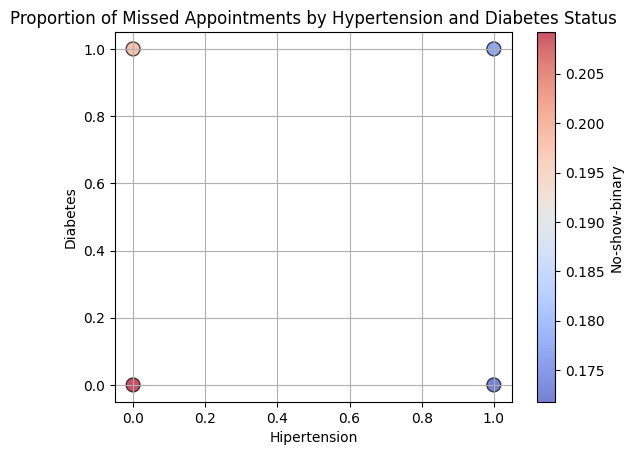

In [7]:
#NOW USING 2D
def convert_to_binary(df, column_name):
    """
    Convert a column to binary format (1 for 'Yes', 0 for 'No').

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    column_name (str): The column to convert.

    Returns:
    pd.DataFrame: The dataframe with the converted column.
    """
    df[f'{column_name}-binary'] = df[column_name].apply(lambda x: 1 if x == 'Yes' else 0)
    return df

def calculate_proportion(df, group_by_columns, condition_column):
    """
    Calculate the proportion of a condition based on grouping columns.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    group_by_columns (list): The columns to group by.
    condition_column (str): The column representing the condition to calculate the proportion for.

    Returns:
    pd.DataFrame: DataFrame containing the mean proportion of the condition for each group.
    """
    return df.groupby(group_by_columns)[condition_column].mean().reset_index()

def create_scatter_plot(df, x_col, y_col, condition_col, title):
    """
    Create a scatter plot to visualize the proportion of a condition based on two factors.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    x_col (str): The column to use for the x-axis.
    y_col (str): The column to use for the y-axis.
    condition_col (str): The column representing the condition to visualize.
    title (str): The title of the scatter plot.
    """
    ax = df.plot.scatter(x=x_col, y=y_col, c=condition_col, cmap='coolwarm', s=100, edgecolor='k', alpha=0.7)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(title)
    ax.grid(True)

# Convert 'No-show' column to binary
df = convert_to_binary(df, 'No-show')

# Calculate proportions
proportions = calculate_proportion(df, ['Hipertension', 'Diabetes'], 'No-show-binary')
print(proportions)

# Create scatter plot
create_scatter_plot(proportions, 'Hipertension', 'Diabetes', 'No-show-binary', 'Proportion of Missed Appointments by Hypertension and Diabetes Status')

steps 1. Convert 'No-show' Column to Binary Steps:

This function converts a specified column in the DataFrame to binary format.
Input: A DataFrame df and the name of the column to convert.
Output: A new column in the DataFrame with the same name suffixed by -binary, where 'Yes' is converted to 1 and 'No' is converted to 0.
Application: The No-show column is converted to No-show-binary with 1 for 'Yes' and 0 for 'No'. 2-Calculate Proportions Steps:
This function calculates the mean proportion of a condition (e.g., missed appointments) for each group defined by specified columns.
Input: A DataFrame df, a list of columns to group by, and the condition column to calculate proportions for.
Output: A DataFrame with the grouped columns and the mean proportion of the condition.
Application: The function groups the data by 'Hipertension' and 'Diabetes', then calculates the mean proportion of missed appointments (from the No-show-binary column) for each group.3-create Scatterplot Steps:

This function creates a scatter plot to visualize the proportion of a condition based on two factors.
Input: A DataFrame df, the names of the columns for the x-axis and y-axis, the column representing the condition to visualize, and the title for the plot.
Output: A scatter plot where the x-axis and y-axis represent the specified columns, and the color of the points represents the proportion of the condition.
Application: The scatter plot visualizes the proportion of missed appointments based on 'Hipertension' and 'Diabetes' status, with color representing the proportion of missed appointments.
Conclusion:The interaction between hypertension and diabetes shows that having both conditions doesn't drastically alter the missed appointment rate compared to having just one condition.
The proportions of missed appointments are fairly consistent when both conditions are present compared to when only one condition is present.

### Research Question 2( does the number of SMS reminders received affect the likelihood of missing an appointment, considering different age groups and health conditions?")

code Description
1=Convert 'No-show' Column to Binary:

 converts the 'No-show' column into a binary format, where 'Yes' is mapped to 1 and 'No' is mapped to 0. This makes it easier to calculate proportions and analyze the data.

Calculate Proportion of Missed Appointments by SMS Reminders:

groups the data by the number of SMS reminders received (SMS_received) and calculates the mean of the No-show-binary column within each group. The mean here represents the proportion of missed appointments for each number of SMS reminders.

Create Bar Plot:

This block of code creates a bar plot to visualize the proportion of missed appointments based on the number of SMS reminders received. The x-axis represents the number of SMS reminders, and the y-axis represents the proportion of missed appointments. The plot uses sky blue bars with black edges for better visual distinction and includes grid lines for readability.


SMS_received
0    0.167035
1    0.275745
Name: No-show-binary, dtype: float64


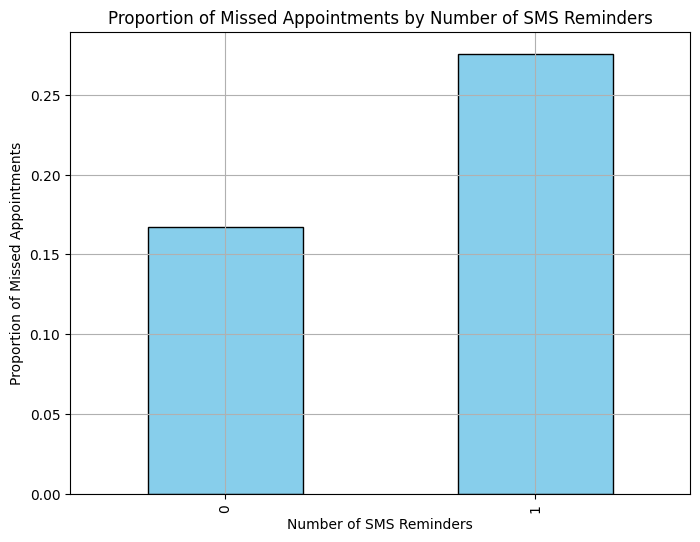

In [8]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate
#ANSWEING the first question does the number of sms reminders affect the like hood of missing an appoitemnt
df['No-show-binary'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)
 #Calculate the proportion of missed appointments for each number of SMS reminders
sms_proportions = df.groupby('SMS_received')['No-show-binary'].mean()
print(sms_proportions)
ax = sms_proportions.plot(kind='bar', figsize=(8, 6), color='skyblue', edgecolor='black')
ax.set_xlabel('Number of SMS Reminders')
ax.set_ylabel('Proportion of Missed Appointments')
ax.set_title('Proportion of Missed Appointments by Number of SMS Reminders')
ax.grid(True)



Here's the interpretation of the bar chart:

Proportion of Missed Appointments:

0 SMS Reminders: 16.70%
1 SMS Reminder: 27.57%
Conclusions:

Increased Proportion with SMS Reminders: The proportion of missed appointments is higher for patients who receive SMS reminders compared to those who do not receive any. Specifically, the proportion increases from 16.70% to 27.57% when at least one SMS reminder is sent.
Effect of SMS Reminders: This suggests that SMS reminders may be associated with a higher likelihood of missed appointments, which could be counterintuitive. Typically, one would expect reminders to reduce missed appointments, but this data shows the opposite trend.
Possible Explanations:
SMS Reminder Timing or Content: The effectiveness of SMS reminders might be influenced by their timing, content, or frequency. It's possible that reminders are sent too late, or the content might not be effective enough in encouraging attendance.
Confounding Factors: Other factors, not accounted for in this simple analysis, might be influencing the results. For instance, patients who receive reminders might have different characteristics or be less likely to attend appointments for reasons beyond the reminders.
Reminder Saturation: There could be an issue with reminder saturation, where patients who are reminded multiple times might perceive the reminders as spam and thus be more likely to miss the appointment.

   Age_group  SMS_received  No-show-binary
0       0-30             0        0.188959
1       0-30             1        0.330743
2      31-40             0        0.169677
3      31-40             1        0.305991
4      41-50             0        0.166129
5      41-50             1        0.264822
6      51-60             0        0.149744
7      51-60             1        0.220794
8      61-70             0        0.129201
9      61-70             1        0.183602
10       71+             0        0.139561
11       71+             1        0.205724


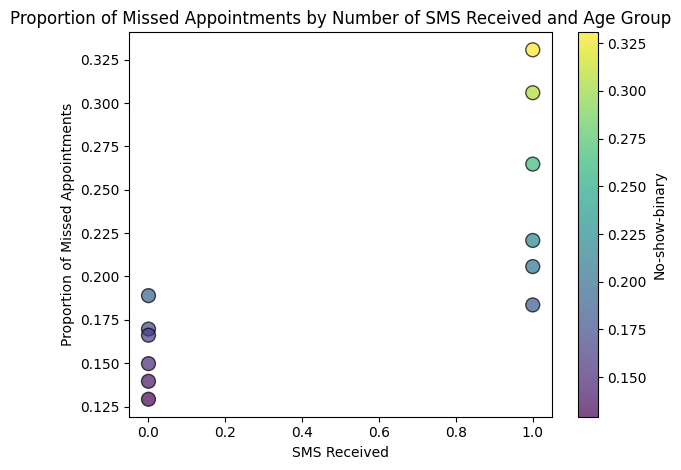

In [9]:
#2D
#Convert 'No-show' to binary (1 for 'Yes', 0 for 'No')
df['No-show-binary'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)
#create age groups
df['Age_group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 100],labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71+'])
# Group by age group and SMS received, then calculate the mean of missed appointments
grouped_data = df.groupby(['Age_group', 'SMS_received'])['No-show-binary'].mean().reset_index()
print(grouped_data)
# Plot the data using Pandas built-in plotting
ax = grouped_data.plot.scatter(x='SMS_received', y='No-show-binary', c='No-show-binary', colormap='viridis', s=100, edgecolor='k', alpha=0.7)
 #Set labels and title
ax.set_xlabel('SMS Received')
ax.set_ylabel('Proportion of Missed Appointments')
ax.set_title('Proportion of Missed Appointments by Number of SMS Received and Age Group')
# Show the plot
ax.figure.tight_layout()
ax.figure.show()

Conclusions based on the scatter plot:

Younger Age Groups (0-30): The proportion of missed appointments increases significantly from 18.90% to 33.07% when receiving 1 SMS reminder.
Middle Age Groups (31-40, 41-50): The proportion of missed appointments also increases with SMS reminders, but the change is less pronounced compared to younger age groups.
Older Age Groups (51+): The proportion of missed appointments shows a smaller increase with SMS reminders, suggesting that the effect of SMS reminders is less significant for older patients.
General Trend:

Across all age groups, the proportion of missed appointments tends to be higher when patients receive at least one SMS reminder compared to those who do not receive any.
The increase is most pronounced in the youngest age group (0-30) and becomes less significant in older age groups.
Possible Insights:

Potential Negative Impact: The data suggests that SMS reminders might be associated with a higher likelihood of missed appointments, especially among younger patients. This could imply that the reminders are ineffective or even counterproductive in some cases.
Age-Related Sensitivity: Younger patients seem more affected by SMS reminders, while older patients show a less pronounced effect. This might be due to different behaviors or attitudes towards reminders based on age.

<a id='conclusions'></a>
## Conclusions
1-thefirst reserarch question impact of Health Conditions on Missed Appointments
Brief Conclusion:
Summary:
Hypertension is associated with a notably lower rate of missed appointments.
Other conditions (Diabetes, Alcoholism, Handicap) show either minor differences or no impact on missed appointments.
2-The 2D analysis investigates how the combination of Hypertension and Diabetes affects the likelihood of missing an appointment. 
Summary:
Patients without hypertension have a higher proportion of missed appointments compared to those with hypertension.
The presence of diabetes alone slightly reduces the proportion of missed appointments for patients without hypertension.
3-The 1D analysis impact of SMS Reminders on Appointment Attendance
Contrary to expectations, receiving SMS reminders is associated with a higher proportion of missed appointments, suggesting that other factors might influence whether patients attend their appointments.
4- the 2D analysis Proportion of Missed Appointments by Age Group and SMS Reminders:
Summary:
Across all age groups, the presence of SMS reminders is associated with a higher proportion of missed appointments.
Younger age groups (0-30, 31-40) exhibit a more pronounced increase in missed appointments with SMS reminders compared to older age groups.
The effectiveness of SMS reminders in reducing missed appointments seems to be limited and may vary based on age group.




In [10]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 496482 bytes to Investigate_a_Dataset.html
